# Decision-making in business: a project


In this project, we are supporting the marketing department of a large online store to increase revenue. The work will be done in two stages: hypothesis prioritization and analysis of A/B test results.


---


## Stage. Hypothesis Prioritization


In the first step, we will evaluate the nine proposed hypotheses to increase revenue. For this purpose, the frameworks **ICE** and **RICE** will be used to prioritize the implementation of the hypotheses.


**Phase Objectives:**
- Evaluation of hypotheses using ICE and RICE.
- Comparison of prioritization results by both methods.
- Analyzing the differences between the results of the methods.


---


## Stage. Analyzing the A/B-test


**In the second stage we will analyze the results of the conducted A/B-test. The work will include:**


1. Construction of key graphs showing changes in cumulative metrics:
- revenue;
- average check;
- conversions.


2. Identifying anomalies among users and orders using statistical methods.


3. Conducting tests for statistical significance of differences between groups:
- on raw data;
- on cleaned data.


4. Making an informed decision about further action based on the results of the test.


---


## Project Outcomes


The outcomes of the work will be:
- **Recommendations** on the prioritized hypotheses.
-**Conclusion**of the A/B test results, which will help the company to choose a further course of action to increase revenue.

# Data description


**File `hypothesis.csv`**
- **Hypothesis** - a brief description of the hypothesis.
- **Reach** - reach of users on a 10-point scale.
- **Impact** -impact on users on a 10-point scale.
- **Confidence** - confidence in the hypothesis on a 10-point scale.
- **Efforts** - resource costs of hypothesis testing on a 10-point scale. The larger the value of` Efforts`, the more expensive the hypothesis testing.


---


**File `orders.csv`**
- **transactionId** - order identifier.
-**visitorId** - identifier of the user who made the order.
- **date** -date when the order was made.
-**revenue** -revenue of the order.
- **group** - A/B-test group the order fell into.


---


**Visitors.csvfile **
- **date** -date.
- **group** - A/B test group.
-**visitors** - number of users on the specified date in the specified A/B-test group.


# **Stage 1: Hypothesis Prioritization**



**Let's start with a review and preprocessing of the data:**

In [1]:
# import of libraries necessary for work

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings
from scipy import stats as st
from scipy.stats import mannwhitneyu

In [2]:
# remove the limit on the number of columns
pd.set_option('display.max_columns', None)


# remove the column width restriction
pd.set_option('display.max_colwidth', None)


# ignore warnings
warnings.filterwarnings( action='ignore')


# limit the display of decimal places
pd.options.display.float_format = ' {:,.3f}'.format


# set the size of the graph
sns.set( rc={'figure.figsize':(10,8)})

In [3]:

try:
    hypothesis = pd.read_csv('C:/Users/Asus/Downloads/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    visitors = pd.read_csv('/datasets/costs_info_short.csv')
except:
    #hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [4]:
def inspect_df(*dataframes, head_rows=5):
    
    for i, df in enumerate(dataframes):
        print(f"--- DataFrame {i + 1} ---")
        
        # Display general information
        print("Data information:")
        df.info()
        print("\n")
        
        # Output the first lines of the dataframe
        print(f"The first { head_rows} of the lines:")
        print(df.head(head_rows))
        print("\n")
        
        # Проверяем на наличие дубликатов
        duplicate_count = df.duplicated().sum()
        print(f"Number of duplicates: {duplicate_count}\n")
        
        # Если есть дубликаты, выводим сообщение
        if duplicate_count > 0:
            print(f"Duplicates have been detectedin DataFrame {i + 1}.\n")
        
        print("\n=============================\n")


In [5]:
inspect_df(hypothesis, orders, visitors, head_rows=5)

--- DataFrame 1 ---
Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


The first 5 of the lines:
                                                                                                     hypothesis  \
0                          Add two new traffic acquisition channels, which will allow attracting 30% more users   
1                                Launch our own delivery service, which will reduce the delivery time of orders   
2  Add product recommendation blocks to the online store website to increase conversion and average order value   
3   Change the category structure, whic

In [6]:
# change the data type for the columns with dates
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [7]:
# Convert column names to snake format


# For hypothesis: all letters are lowercase
hypothesis.columns = hypothesis.columns.str.lower()

# For orders: replace "Id" in column names with "_id" for a more unified style
orders.columns = [col.replace('Id', '_id') for col in orders.columns]

display(hypothesis.columns)
orders.columns


Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts  '], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

**Let's proceed to the prioritization of hypotheses:**

In [8]:

hypothesis.columns = [col.strip() for col in hypothesis.columns]

# Now calculate the ICE score
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

# Display the top 5 hypotheses by ICE score
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(5)

,hypothesis,ice
8,Launch a promotion that gives a discount on products on the customer's birthday,16.200
0,"Add two new traffic acquisition channels, which will allow attracting 30% more users",13.333
7,Add a subscription form on all main pages to build a customer base for email newsletters,11.200
6,Show banners with current promotions and sales on the homepage to increase conversion,8.000
2,Add product recommendation blocks to the online store website to increase conversion and average order value,7.000


In [9]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(5)

,hypothesis,ice
8,Launch a promotion that gives a discount on products on the customer's birthday,16.200
0,"Add two new traffic acquisition channels, which will allow attracting 30% more users",13.333
7,Add a subscription form on all main pages to build a customer base for email newsletters,11.200
6,Show banners with current promotions and sales on the homepage to increase conversion,8.000
2,Add product recommendation blocks to the online store website to increase conversion and average order value,7.000


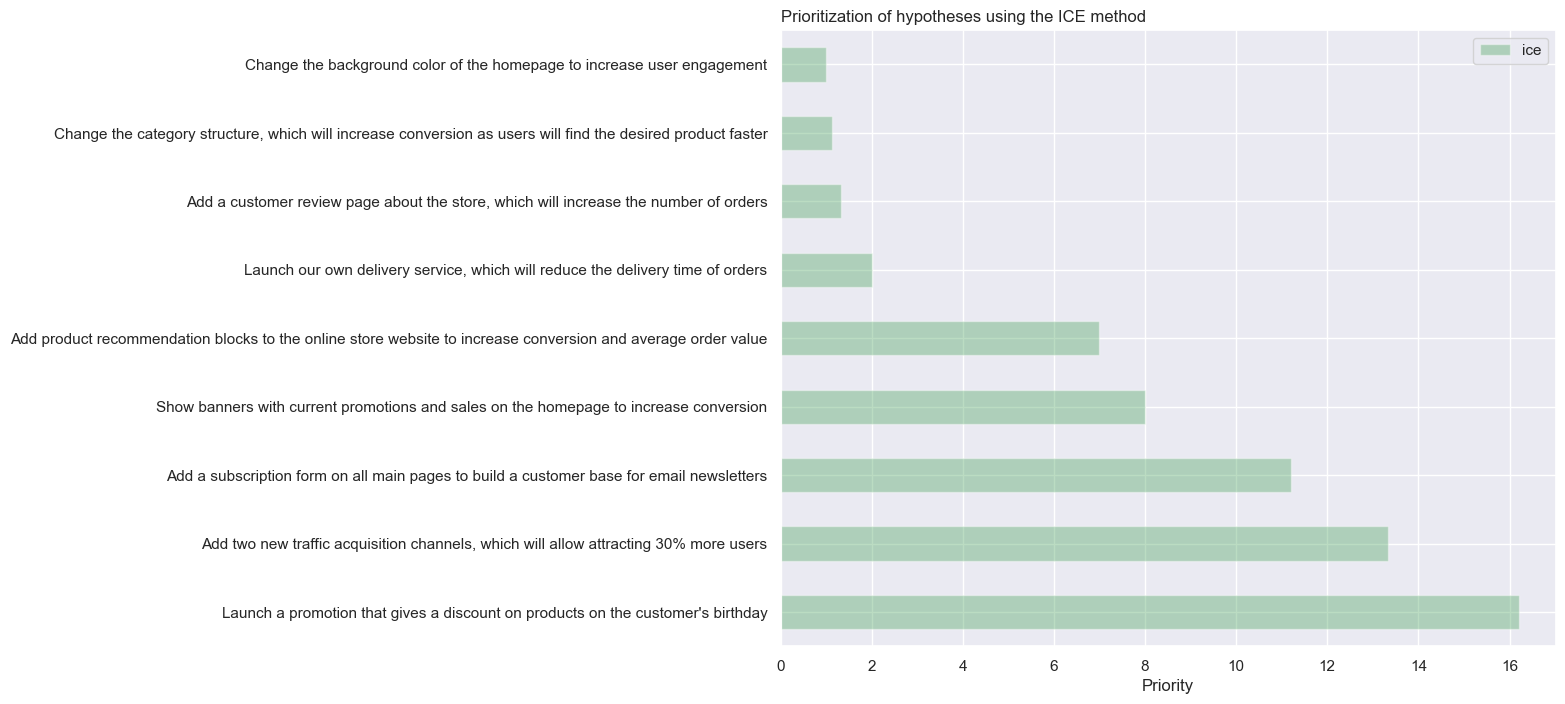

In [10]:
# Construct a horizontal histogram to visualize the prioritization of hypotheses by ICE
ax = (hypothesis[['hypothesis', 'ice']]
      .set_index('hypothesis')
      .sort_values('ice', ascending=False)
      .plot(kind='barh', color='g', alpha=0.4))

ax.grid(True)

ax.set_xlabel('Priority')
ax.set_ylabel('')

ax.set_title('Prioritization of hypotheses using the ICE method', loc='left')

plt.show()

In [11]:
# Hypothesis prioritization using the RICE method
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * 
                      hypothesis['confidence'] / hypothesis['efforts'])

# Display the top 5 hypotheses with the highest RICE priority
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).head(5)


,hypothesis,rice
7,Add a subscription form on all main pages to build a customer base for email newsletters,112.000
2,Add product recommendation blocks to the online store website to increase conversion and average order value,56.000
0,"Add two new traffic acquisition channels, which will allow attracting 30% more users",40.000
6,Show banners with current promotions and sales on the homepage to increase conversion,40.000
8,Launch a promotion that gives a discount on products on the customer's birthday,16.200


In [12]:
hypothesis[['hypothesis','ice', 'rice']].sort_values(by='rice', ascending=False).head(5)

,hypothesis,ice,rice
7,Add a subscription form on all main pages to build a customer base for email newsletters,11.200,112.000
2,Add product recommendation blocks to the online store website to increase conversion and average order value,7.000,56.000
0,"Add two new traffic acquisition channels, which will allow attracting 30% more users",13.333,40.000
6,Show banners with current promotions and sales on the homepage to increase conversion,8.000,40.000
8,Launch a promotion that gives a discount on products on the customer's birthday,16.200,16.200


**Conclusion:**
**ICE Method:**
Hypothesis 8, offering a birthday discount, has the highest priority. Hypotheses 0, 7, 6 and 2 also have high priority.


**RICE Method**
Hypothesis 7 has maximum priority due to high coverage. Hypotheses 2, 0, 6 and 8 have changed their positions compared to ICE due to Reach.


Coverage consideration in the RICE method significantly changed the prioritization of hypotheses. The hypothesis "Add a subscription form to all main pages to gather a customer base for email newsletters" ranks first in coverage consideration, while the hypothesis "Launch a promotion that gives a discount on a product on your birthday" was the leader in the ICE method.



# Step 2: Analyze the A/B test


In [13]:
# Generate an array of unique combinations of dates and test groups
unique_dates_groups = orders[['date', 'group']].drop_duplicates()

# Let's calculate the cumulative metrics by day for each group
cumulative_orders = unique_dates_groups.apply(
    lambda row: orders[
        (orders['date'] <= row['date']) & (orders['group'] == row['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

cumulative_orders.head(5)


,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [14]:
# Generate aggregated cumulative data by day for online store visitors

cumulative_visitors = unique_dates_groups.apply(
    lambda row: visitors[
        (visitors['date'] <= row['date']) & (visitors['group'] == row['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitors': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

cumulative_visitors.head(5)


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [15]:
# Combine cumulative data on orders and visitors into one table

cumulative_data = cumulative_orders.merge(
    cumulative_visitors,
    left_on=['date', 'group'],
    right_on=['date', 'group']
)

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Conversion: the ratio of orders to visitors
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

cumulative_data.head(5)


,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033
1,2019-08-01,B,21,20,101217,713,0.029
2,2019-08-02,A,44,38,242401,1338,0.033
3,2019-08-02,B,45,43,266748,1294,0.035
4,2019-08-03,A,68,62,354874,1845,0.037


**Construct a graph of cumulative revenue:**

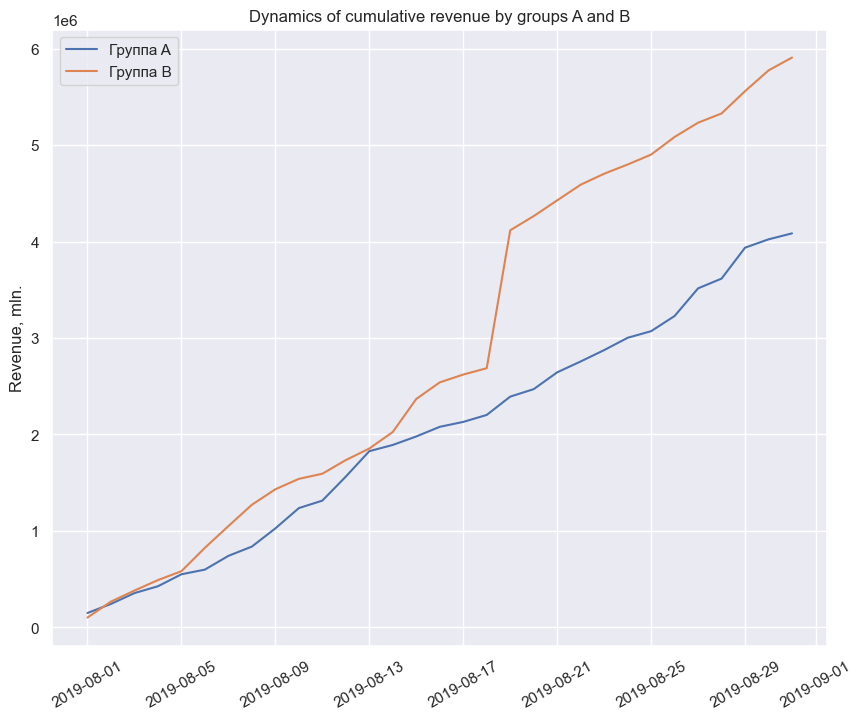

In [16]:
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]

cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='Группа A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='Группа B')

plt.title('Dynamics of cumulative revenue by groups A and B')
plt.ylabel('Revenue, mln.')
plt.xticks(rotation=30)
plt.legend()
plt.show()


The graph shows that Group B's cumulative revenue is consistently higher than Group A. Group B shows a spike in revenue around August 18, which may be due to large orders or outliers in the data.

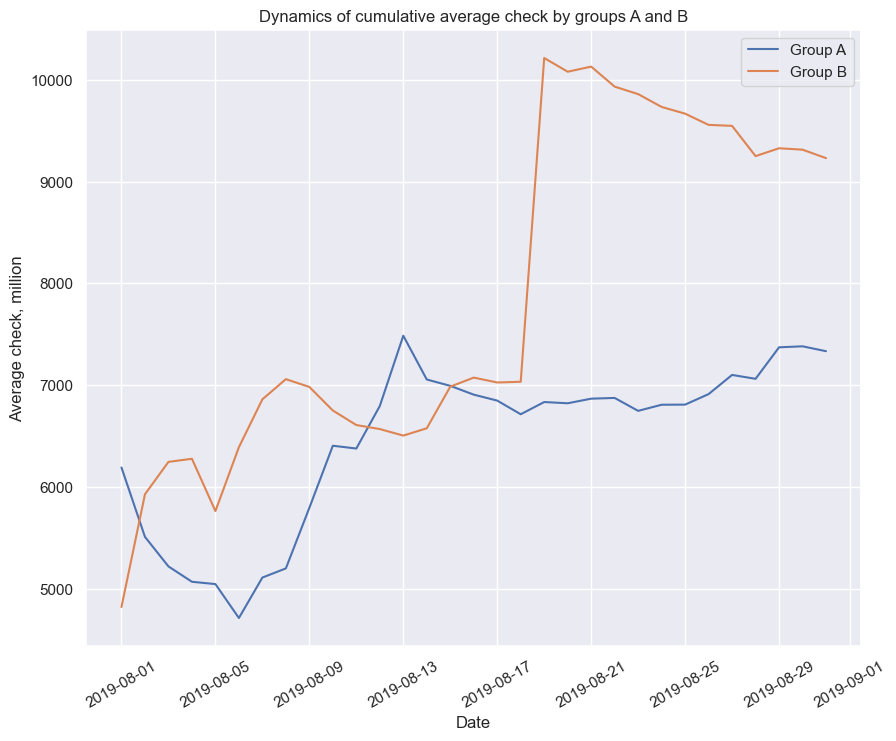

In [17]:
# Plotting the average check by group
plt.plot(
    cumulative_revenue_a['date'], 
    cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'], 
    label='Group A'
)

plt.plot(
    cumulative_revenue_b['date'], 
    cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], 
    label='Group B'
)

plt. title('Dynamics of cumulative average check by groups A and B')
plt.ylabel('Average check, million')
plt.xlabel("Date")
plt.xticks( rotation=30)
plt.legend()
plt.grid(True)
plt.show()


The graph shows that the cumulative average check in Group A remains relatively stable after initial fluctuations, while Group B shows a spike on August 17-18. This indicates the presence of a large order or outlier in the data. After the spike, the average check in Group B gradually decreases, but remains higher than in Group A. 

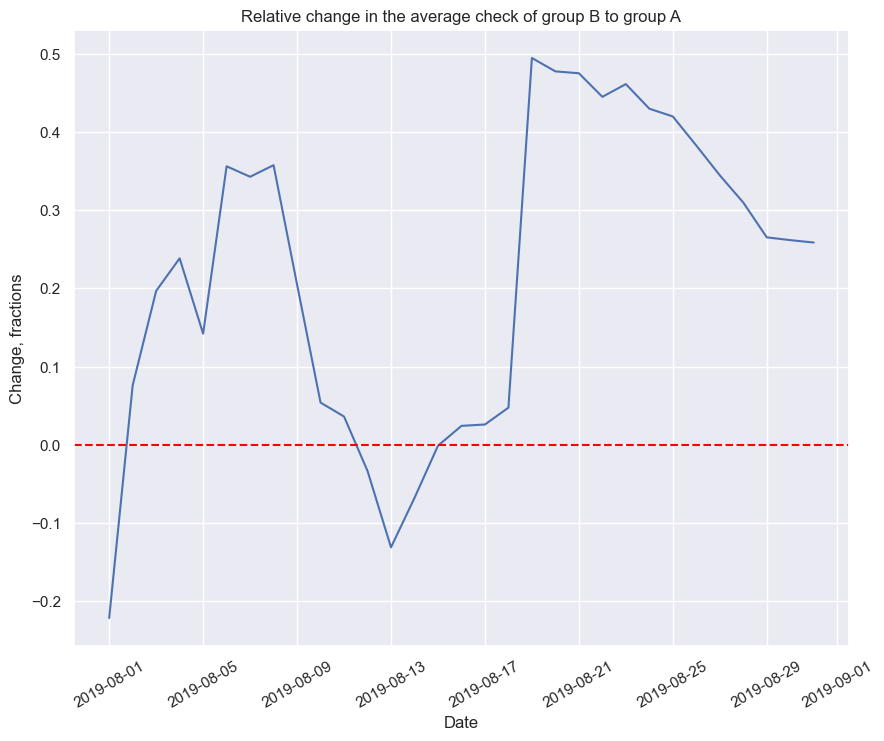

In [18]:
# Combining cumulative revenue and order data for groups A and B
cumulative_revenue_combined = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    on='date', 
    how='left', 
    suffixes=['_a', '_b']
)

# Plotting the relative change in the average check of Group B to Group A
plt.plot(
    cumulative_revenue_combined['date'], 
    (
        cumulative_revenue_combined['revenue_b'] / cumulative_revenue_combined['orders_b']
    ) /
    (
        cumulative_revenue_combined['revenue_a'] / cumulative_revenue_combined['orders_a']
    ) - 1,
    label='Relative change'
)

# Добавление горизонтальной линии на уровне 0
plt.axhline(y=0, color='red', linestyle='--')

plt. title('Relative change in the average check of group B to group A')
plt.ylabel('Change, fractions')
plt.xlabel('Date')
plt.xticks( rotation=30)
plt.grid(True)
plt.show()



The graph shows significant fluctuations in the relative change in the average check of group B compared to group A. Sharp jumps are particularly noticeable, which is probably due to outliers or large orders in group B.

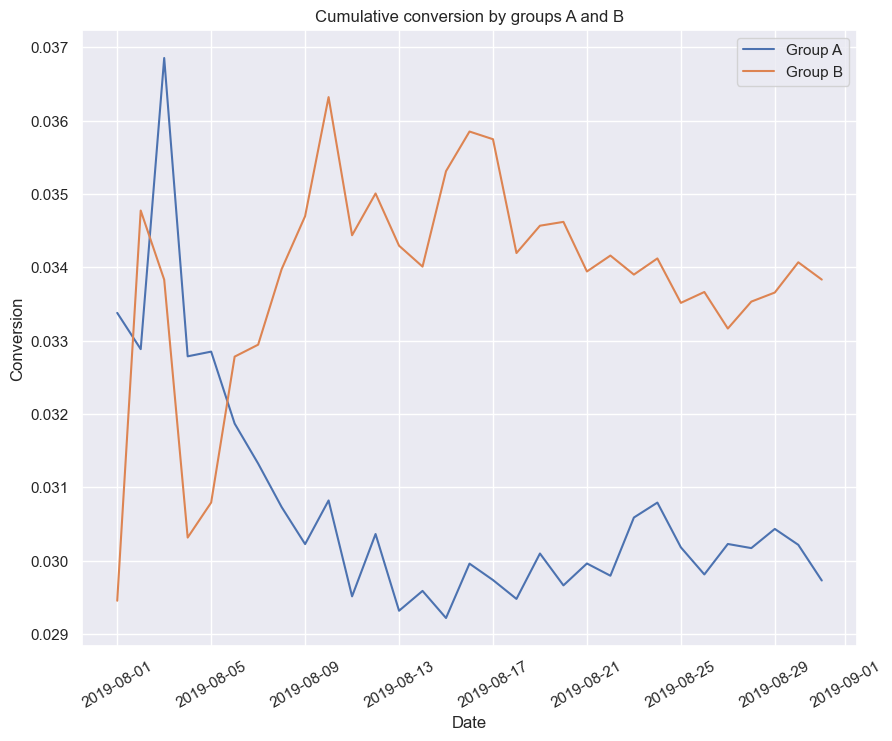

In [19]:
# Separate the data by group
cumulative_conversion_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_conversion_b = cumulative_data[cumulative_data['group'] == 'B']


# Build a cumulative conversion graph
plt.plot(
cumulative_conversion_a['date'],
cumulative_conversion_a['conversion'],
label='Group A'
)


plt.plot(
cumulative_conversion_b['date'],
cumulative_conversion_b['conversion'],
label='Group B'
)


plt.legend()
plt. title('Cumulative conversion by groups A and B')
plt.xlabel('Date')
plt.ylabel('Conversion')
plt.xticks( rotation=30)
plt.grid(True)
plt.show()



The graph shows that the conversion of group B is consistently higher than that of group A starting from the first days of the experiment. After initial fluctuations, the conversion of both groups stabilized, with a clear advantage of group B.

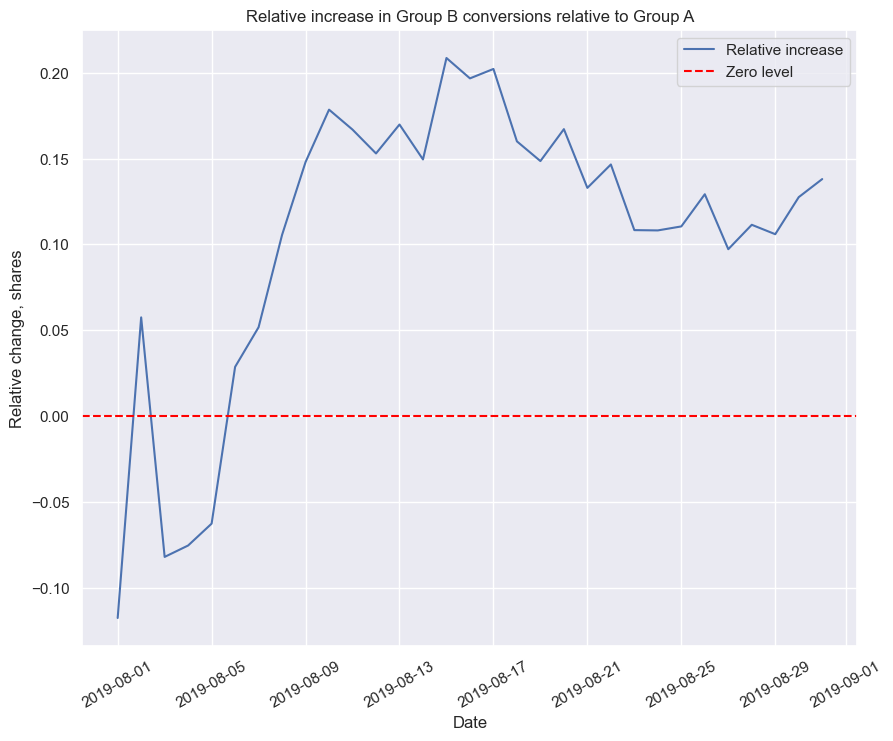

In [20]:
# Divide the data into groups A and B
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

# Combining cumulative conversion data for groups A and B
cumulative_conversion_comparison = (
    cumulative_data_a[['date', 'conversion']]
    .merge(
        cumulative_data_b[['date', 'conversion']], 
        on='date', 
        how='left', 
        suffixes=['_a', '_b']
    )
)

# Plotting the relative increase in the conversion rate of group B vs. group A
plt.plot(
    cumulative_conversion_comparison['date'], 
    cumulative_conversion_comparison['conversion_b'] / 
    cumulative_conversion_comparison['conversion_a'] - 1,
    label='Relative increase'
)

plt.axhline(y=0, color='red', linestyle='--', label='Zero level')

plt. title('Relative increase in Group B conversions relative to Group A')
plt.ylabel('Relative change, shares')
plt.xlabel('Date')
plt.xticks( rotation=30)
plt.legend()
plt.grid(True)
plt.show()


The graph shows that at the beginning of the experiment there were significant fluctuations in the relative increase in the conversion of group B compared to group A. After August 5, the increase stabilizes and is kept at about 15-20%. This indicates a significant advantage of group B compared to group A.

Let's build a dot plot of the number of orders by user:

In [21]:
orders_per_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}) \
                         .rename(columns={'transaction_id': 'orders'})

orders_per_user.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


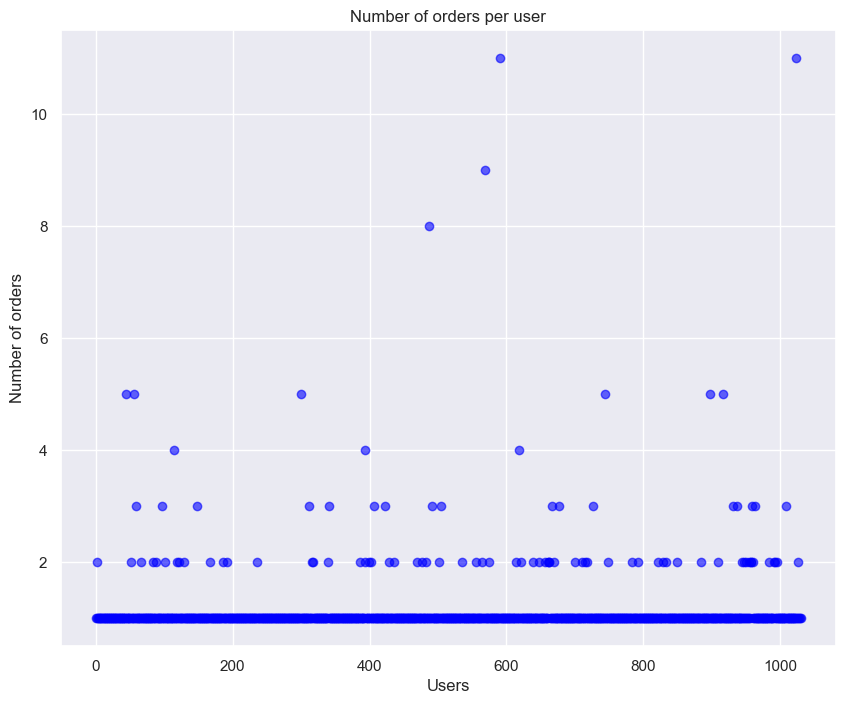

In [22]:
x_values = pd.Series(range(0, len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'], color='blue', alpha=0.6)
plt. title('Number of orders per user')
plt.xlabel('Users')
plt.ylabel('Number of orders')
plt.grid(True)
plt.show()

Most users make 1-2 orders. However, there are outliers - individual users who have made more than 4 orders.

Let's calculate the 95th and 99th percentiles of the number of orders per user:

In [23]:
percentile_95 = np.percentile(orders_per_user['orders'], 95)
percentile_99 = np.percentile(orders_per_user['orders'], 99)

print(f'95-й перцентиль: {percentile_95:.2f}')
print(f'99-й перцентиль: {percentile_99:.2f}')


95-й перцентиль: 2.00
99-й перцентиль: 4.00


The 95th percentile is 2, which means that 95% of users make no more than 2 orders.
The 99th percentile is 4, which means that only 1% of users make 4 or more orders.


Therefore, users with 4 or more orders can be considered anomalous and excluded from the analysis.


**Let's build a dot plot of order values:**

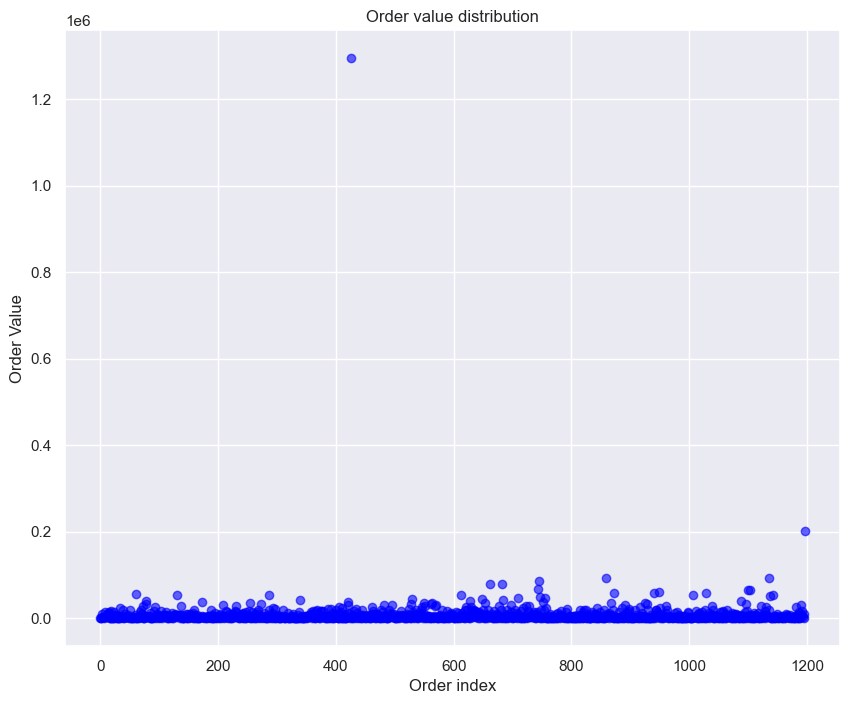

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='blue', alpha=0.6)

plt. title('Order value distribution')
plt.xlabel('Order index')
plt.ylabel('Order Value')
plt.grid(True)
plt.show()


Most orders are within a small value, but outliers are present, including one abnormally expensive order costing more than 1.2 million. These outliers can significantly affect the results of the analysis and need to be accounted for in order to reach correct conclusions.

**Let's calculate the 95th and 99th percentiles of order values. Let's choose a boundary for defining abnormal orders:**

In [32]:
percentile_95_revenue = np.percentile(orders['revenue'], 95)
percentile_99_revenue = np.percentile(orders['revenue'], 99)

print(f'95th order value percentile: {percentile_95_revenue:.2f}')
print(f'99th percentile of order value: {percentile_99_revenue:.2f}')

# Define the boundary for abnormal orders
anomaly_threshold = percentile_99_revenue
print(f'A boundary for abnormal orders: {anomaly_threshold:.2f}')


95th order value percentile: 28000.00
99th percentile of order value: 58233.20
A boundary for abnormal orders: 58233.20


**Let's calculate the statistical significance of differences in the average number of orders per visitor between groups using "raw" data:**



Null and alternative hypothesis:
**Null hypothesis (H₀):**
The average number of orders per user does not differ between groups A and B.


**Alternative hypothesis (H₁):**
The average number of orders per user is different between groups A and B.

In [33]:
# Data preparation: number of orders per user by group
orders_by_user_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .rename(columns={'transaction_id': 'orders'})
)

orders_by_user_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .rename(columns={'transaction_id': 'orders'})
)

# Supplementing samples with zeros to account for users who have not placed orders
sample_a = pd.concat(
    [orders_by_user_a['orders'], 
     pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_user_a['orders'])))],
    axis=0
)

sample_b = pd.concat(
    [orders_by_user_b['orders'], 
     pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_user_b['orders'])))],
    axis=0
)

# Применение теста Манна-Уитни
p_value = mannwhitneyu(sample_a, sample_b, alternative='two-sided')[1]
mean_diff = sample_b.mean() - sample_a.mean()

print(f'P-value: {p_value:.4f}')
print(f'Average difference in the number of orders per user: {mean_diff:.4f}')

if p_value < 0.05:
    print('There are statistically significant differences between the groups.')
else:
    print('No statistically significant differences between groups.')
    
relative_increase = sample_b.mean() / sample_a.mean() - 1
print(f"The relative increase in the conversion of group B relative to group A is: {relative_increase:.2%}")


P-value: 0.0168
Average difference in the number of orders per user: 0.0041
There are statistically significant differences between the groups.
The relative increase in the conversion of group B relative to group A is: 13.81%


Rejecting the null hypothesis.

The conversion of group B is higher and this difference is statistically significant.

**Let's calculate the statistical significance of differences in average order receipt between groups using "raw" data:**

In [34]:
# Data preparation: order revenue for each group
revenue_a = orders[orders['group'] == 'A']['revenue']
revenue_b = orders[orders['group'] == 'B']['revenue']


# Application of the Mann-Whitney criterion
p_value = mannwhitneyu(revenue_a, revenue_b, alternative='two-sided')[1]
mean_diff = revenue_b.mean() - revenue_a.mean()

print(f'P-value: {p_value:.4f}')
print(f'Average difference in average order receipt between groups: {mean_diff:.2f}')

if p_value < 0.05:
    print('There are statistically significant differences in average order receipt between the groups.')
else:
    print('No statistically significant differences in average order receipt between groups.')


P-value: 0.7293
Average difference in average order receipt between groups: 1897.30
No statistically significant differences in average order receipt between groups.


**Let's calculate the statistical significance of differences in the average number of orders per visitor between groups according to the "cleaned" data:**

In [35]:
# Thresholds to filter out anomalous users
order_threshold = np.percentile(orders_per_user['orders'], 99) # Threshold for number of orders
revenue_threshold = np.percentile(orders['revenue'], 99) # Threshold for order value

# Identify anomalous users
high_order_users = orders_per_user[orders_per_user['orders'] > order_threshold]['visitor_id']
high_revenue_users = orders[orders['revenue'] > revenue_threshold]['visitor_id']

outliers = pd.concat([high_order_users, high_revenue_users]).drop_duplicates()

# Generate cleansed data for group A
filtered_sample_a = pd.concat([
    orders_by_user_a[orders_by_user_a['visitor_id'].isin(outliers) == False]['orders'],
    pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_user_a['orders'])))
])

# Generate cleansed data for group B
filtered_sample_b = pd.concat([
    orders_by_user_b[orders_by_user_b['visitor_id'].isin(outliers) == False]['orders'],
    pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_user_b['orders'])))
])

# Application of the Mann-Whitney test
p_value_filtered = mannwhitneyu(filtered_sample_a, filtered_sample_b, alternative='two-sided')[1]
mean_difference = filtered_sample_b.mean() - filtered_sample_a.mean()

print(f'P-value (cleansed data): {p_value_filtered:.4f}')
print(f'Average difference in the number of orders per user (cleaned data): {mean_difference:.4f}')

if p_value_filtered < 0.05:
    print('There are statistically significant differences between groups in the average number of orders per user (cleaned data).')
else:
    print('There are no statistically significant differences in the average number of orders per user between groups (cleaned data).')

# Calculation of relative growth of group B to group A
relative_increase = sample_b.mean() / sample_a.mean() - 1
print(f'The relative increase of group B to group A is: {relative_increase:.2%}')


P-value (cleansed data): 0.0138
Average difference in the number of orders per user (cleaned data): 0.0042
There are statistically significant differences between groups in the average number of orders per user (cleaned data).
The relative increase of group B to group A is: 13.81%


**Let's calculate the statistical significance of differences in average order receipt between groups using "cleaned" data:**

In [36]:
#Generate cleaned data for group A (without anomalies)
filtered_revenue_a = orders[
    (orders['group'] == 'A') & 
    (orders['visitor_id'].isin(outliers) == False)
]['revenue']

# Generate cleaned data for group B (without anomalies)
filtered_revenue_b = orders[
    (orders['group'] == 'B') & 
    (orders['visitor_id'].isin(outliers) == False)
]['revenue']

# Applying the Mann-Whitney test
p_value_filtered = mannwhitneyu(filtered_revenue_a, filtered_revenue_b, alternative='two-sided')[1]
mean_diff_filtered = filtered_revenue_b.mean() - filtered_revenue_a.mean()

print(f'P-value (очищенные данные): {p_value_filtered:.4f}')

if p_value_filtered < 0.05:
    print('There are statistically significant differences between groups in average order receipt (cleaned data).')
else:
    print('No statistically significant differences in average order receipt between groups (cleaned data).')


P-value (очищенные данные): 0.9575
No statistically significant differences in average order receipt between groups (cleaned data).


# Conclusions and recommendations based on A/B test results


**Hypothesis Prioritization**


-**ICE Method**:
- Hypothesis 8 (birthday discount) has the highest priority.
- Hypotheses 0, 7, 6, and 2 also have high priority.
- **RICE Method**:
- Hypothesis 7 is highlighted as the most promising hypothesis by accounting for reach (Reach).
- The order of prioritization of other hypotheses has changed compared to ICE.
- **Consideration of coverage** in the RICE method significantly affects prioritization, which is important to consider when selecting hypotheses for implementation.
------
**Key Metrics Test Results**


**Revenue**
- Group B's cumulative revenue is consistently above Group A.
- The spike around August 18 may be due to large orders or outliers.


**Average check**
- The average check of group A is stable.
- In group B, there are spikes due to large orders.
- After accounting for outliers **nostatistically significant differences** in average check between groups **were found**.


**Conversion**
- The conversion rate of group B is consistently higher than that of group A throughout the whole test.
- The relative increase in the conversion rate of group B relative to group A is **13.81%**.
- **Statistically significant differences** in conversion are confirmed on both "raw" data and after anomaly filtering.
-----
**Recommendation**


Based on the data and analysis of the metrics, we suggest:


- **Stop the test and fix the victory of group B** for the following reasons:
- Group B's conversion rate is significantly higher than Group A (by **13.81%**) and this difference is statistically significant.
- The average check has no statistically significant differences between the groups, but testing has shown that Group B provides a steady increase in conversion.


- Given the high conversion rate of Group B, **improvements in user engagement** could lead to significant revenue growth.